In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
warnings.filterwarnings('ignore')

In [4]:
# Load dataset
df = pd.read_csv("Hitters.csv")

In [5]:
# Exploratory Data Analysis
print("First 5 rows of the dataset:\n", df.head())
print("\nDataset statistics:\n", df.describe())
print("\nData types:\n", df.dtypes)
print("\nNull values:\n", df.isnull().sum())

First 5 rows of the dataset:
    AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  

Dataset statistics:


In [6]:
# Data Preprocessing (if necessary)
# Selecting the feature 'CRuns' for clustering
feature = 'CRuns'

In [7]:
# Check for zero or missing values and handle them if necessary
print("Number of zero values in {}: {}".format(feature, df[df[feature] == 0].shape[0]))
print("Number of missing values in {}: {}".format(feature, df[feature].isnull().sum()))

Number of zero values in CRuns: 0
Number of missing values in CRuns: 0


In [8]:
# Scaling the data for clustering
scaler = StandardScaler()
df[feature] = scaler.fit_transform(df[[feature]])

In [9]:
# Apply Hierarchical Clustering
# Using 'ward' linkage method for hierarchical clustering
linked = linkage(df[[feature]], method='ward')

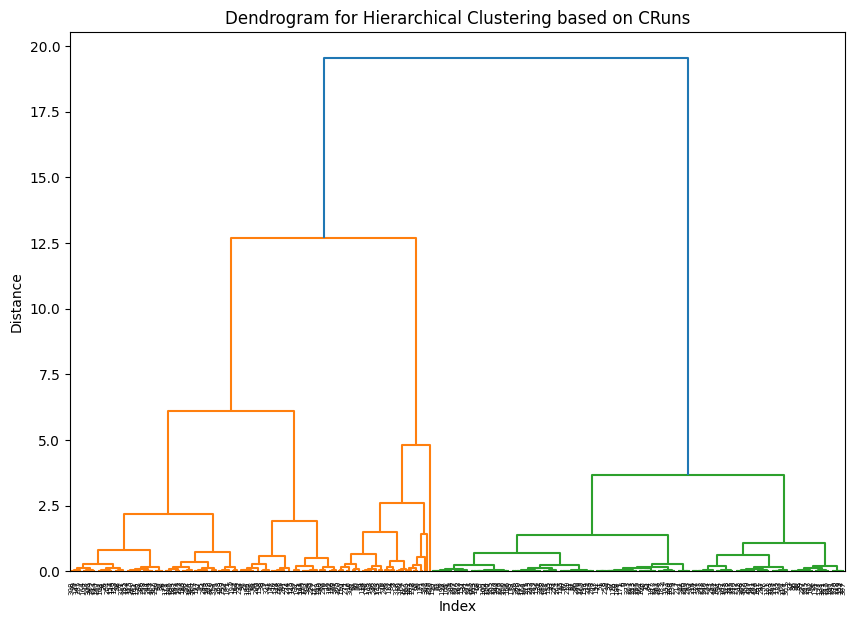

In [10]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering based on CRuns")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

In [11]:
# Assigning clusters based on a threshold distance
# Choose an optimal threshold to cut the dendrogram
threshold = 5  # Adjust based on dendrogram to find optimal clusters
df['Cluster'] = fcluster(linked, threshold, criterion='distance')

In [12]:
# Display cluster information
print("Cluster assignments:\n", df['Cluster'].value_counts())

Cluster assignments:
 Cluster
1    172
4     70
3     41
2     39
Name: count, dtype: int64


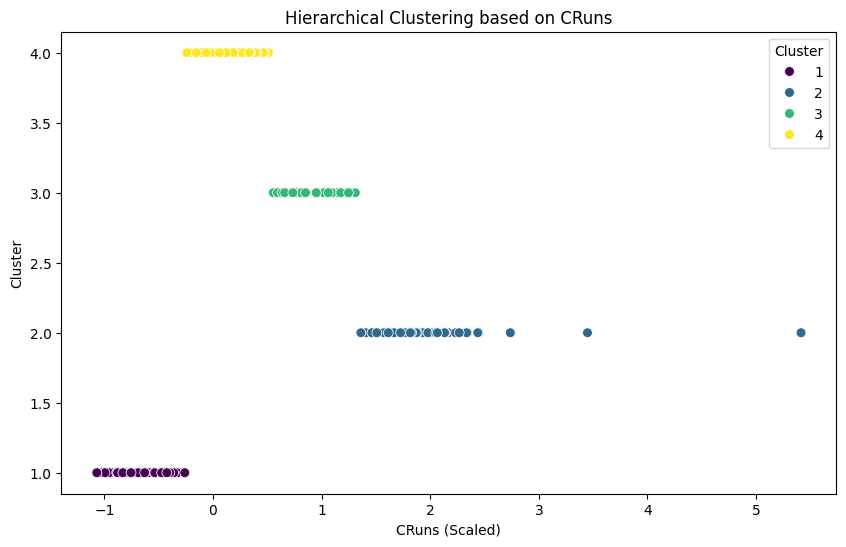

In [13]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature, y='Cluster', data=df, hue='Cluster', palette='viridis', s=50)
plt.title("Hierarchical Clustering based on CRuns")
plt.xlabel("CRuns (Scaled)")
plt.ylabel("Cluster")
plt.legend(title="Cluster")
plt.show()